## ロジスティック回帰
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力（確率値）：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  f(\mathbf{w}^{\mathrm{T}} \mathbf{x})$
  - $f$はシグモイド関数：$f(x) = \frac{1}{1 + \exp(-x)}$

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### 疑似データでScikit-learnによるロジステック回帰

In [2]:
np.random.seed(1234)

# 1つ目のカテゴリに属するデータ
data1 = np.random.multivariate_normal((0, 0), [[4,0],[0,4]], 20)
label1 = np.zeros(len(data1)) # ラベルは0とする

# 2つ目のカテゴリに属するデータ
data2 = np.random.multivariate_normal((4, 4), [[4,0],[0,4]], 20)
label2 = np.ones(len(data2)) # ラベルは1とする

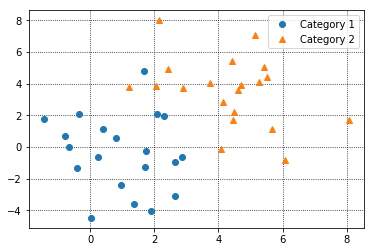

In [3]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1[:, 0], data1[:, 1], 'o', color='C0', label='Category 1')
plt.plot(data2[:, 0], data2[:, 1], '^', color='C1', label='Category 2')
plt.legend(loc='best')
plt.show()

In [4]:
# scikit-learnに渡すため，2つのデータを結合する
X = np.concatenate([data1, data2])
y = np.concatenate([label1, label2])
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000,
                    fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -145.974, w1 = 35.930, w2 = 13.480


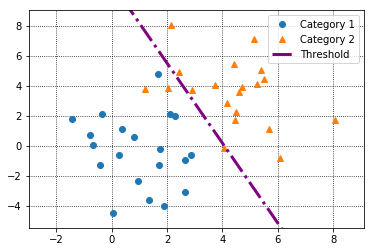

In [5]:
# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1[:, 0], data1[:, 1], 'o', color='C0', label='Category 1')
plt.plot(data2[:, 0], data2[:, 1], '^', color='C1', label='Category 2')

# 境界線をプロットして表示
# 紫：境界線
x1, x2 = X[:, 0], X[:, 1]
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')
plt.show()

#### 補足｜境界線の求め方

- 境界線は$\hat{Y}(\mathbf{x}; \mathbf{w}) = f(\mathbf{w}^{\mathrm{T}} \mathbf{x}) = 0.5$となる部分を示している
- シグモイド関数$f$は$f(0) = 0.5$を取る
- よって， 予測値$\hat{Y}(\mathbf{x}; \mathbf{w})$が0.5を取る条件は$\mathbf{w}^{\mathrm{T}} \mathbf{x} = w_0 + w_1 x_1 + w_2 x_2 = 0$である
- $w_0 + w_1 x_1 + w_2 x_2 = 0$を$x_2$について解くと，$x_2 = - \frac{w_1}{w_2} x_1 - \frac{w_0}{w_2}$が得られる
- あとは，$x_1$（横軸の値）を変化させれば対応する$x_2$（縦軸の値）が求まるので，それをプロットする

In [6]:
# ラベルを予測
y_est = clf.predict(X)
print('---予測ラベル---')
print(y_est) # （データ数, ）の1次元配列

# 確率値を得る
y_est_proba = clf.predict_proba(X)
print('---確率値---')
print(y_est_proba) # (データ数, クラス数)の二次元配列．1列目はラベル0である確率，2列目はラベル1である確率を意味する

---予測ラベル---
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
---確率値---
[[1.00000000e+00 2.35557802e-63]
 [1.00000000e+00 4.53111511e-23]
 [1.00000000e+00 3.18820060e-76]
 [1.00000000e+00 9.50229578e-45]
 [1.00000000e+00 6.83559515e-90]
 [1.00000000e+00 1.28791301e-16]
 [1.00000000e+00 4.89182354e-58]
 [1.00000000e+00 1.59617203e-74]
 [1.00000000e+00 4.39441711e-48]
 [1.00000000e+00 5.28628934e-41]
 [1.00000000e+00 3.97513177e-78]
 [1.00000000e+00 1.32102450e-51]
 [1.00000000e+00 1.76545373e-28]
 [1.00000000e+00 2.58202537e-64]
 [1.00000000e+00 1.94616512e-57]
 [1.00000000e+00 1.37835775e-72]
 [1.00000000e+00 3.50380621e-19]
 [1.00000000e+00 1.34936185e-38]
 [1.00000000e+00 5.21037581e-64]
 [9.99999999e-01 7.36791114e-10]
 [0.00000000e+00 1.00000000e+00]
 [8.42584279e-01 1.57415721e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+0

In [7]:
# 対数尤度を表示
# 対数尤度は-∞から0の値を返す（0に近いほど当てはまりがよい）
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(-log_loss(y, y_est_proba, normalize=False))) # 対数尤度の計算には確率値を使う

# 正答率を表示
print('正答率 = {}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -56.626
正答率 = 92.5%


In [8]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), index=['正解 = 0', '正解 = 1'], columns=['予測値 = 0', '予測値 = 1'])
conf_mat

,予測値 = 0,予測値 = 1
正解 = 0,20,0
正解 = 1,3,17


### 疑似データでScikit-learnによるロジステック回帰 2
* 実際のデータによく似た疑似データで，説明変数が多次元の場合のロジスティック回帰モデルを構築していきましょう

中古住宅のデータをもう一度使います
* Price : 値段(百万円)
* AreaSize : 土地面積($\mathrm{m}^2$)
* HouseSize : 家面積($\mathrm{m}^2$)
* PassedYear : 経過年数(年)
* Train : 電車での最寄り駅から主要駅までの所要時間(分)
* Walk : 徒歩での最寄り駅から家までの所要時間(分)

In [9]:
df_house = pd.DataFrame({
        "Price":[24.8, 59.5, 7, 7.5, 9.8, 13.5, 14.9, 27, 27, 28, 28.5, 23, 12.9, 18, 23.7, 29.8, 17.8, 5.5, 8.7, 10.3, 14.5, 17.6, 16.8],
        "AreaSize":[98.4, 379.8, 58.6, 61.5, 99.6, 76.2, 115.7, 165.2, 215.2, 157.8, 212.9, 137.8, 87.2, 139.6, 172.6, 151.9, 179.5, 50, 105, 132, 174, 176, 168.7],
        "HouseSize":[74.2, 163.7, 50.5, 58, 66.4, 66.2, 59.6, 98.6, 87.4, 116.9, 96.9, 82.8, 75.1, 77.9, 125, 85.6, 70.1, 48.7, 66.5, 51.9, 82.3, 86.1, 80.8],
        "PassedYear":[4.8, 9.3, 13, 12.8, 14, 6, 14.7, 13.6, 13.3, 6.7, 3.1, 10.3, 11.6, 10.5, 3.8, 5.4, 4.5, 14.6, 13.7, 13, 10.3, 4.4, 12.8],
        "Train":[5, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 23, 23, 23, 28, 32, 37, 37, 37, 37, 37, 41],
        "Walk":[6, 12, 2, 1, 5, 1, 4, 2, 7, 6, 5, 20, 8, 3, 5, 4, 2, 3, 11, 6, 18, 10, 2]
    })
df_house.index.name="id"

# Priceの値を2000万以上なら1，そうでなければ0に変更
df_house['Price'] = df_house['Price'] >= 20

display(df_house)
df_house.describe()

,Price,AreaSize,HouseSize,PassedYear,Train,Walk
id,,,,,,
0,True,98.4,74.2,4.8,5,6
1,True,379.8,163.7,9.3,12,12
2,False,58.6,50.5,13.0,16,2
3,False,61.5,58.0,12.8,16,1
4,False,99.6,66.4,14.0,16,5
5,False,76.2,66.2,6.0,16,1
6,False,115.7,59.6,14.7,16,4
7,True,165.2,98.6,13.6,16,2
8,True,215.2,87.4,13.3,16,7


,AreaSize,HouseSize,PassedYear,Train,Walk
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,144.139130,81.356522,9.834783,23.260870,6.217391
std,70.086095,26.436955,4.023071,10.247915,5.062846
min,50.000000,48.700000,3.100000,5.000000,1.000000
25%,99.000000,66.300000,5.700000,16.000000,2.500000
50%,139.600000,77.900000,10.500000,19.000000,5.000000
75%,173.300000,86.750000,13.150000,34.500000,7.500000
max,379.800000,163.700000,14.700000,41.000000,20.000000


In [10]:
# 線形回帰のときと同様に説明変数を2つに絞って，ロジスティック回帰
y = df_house["Price"].values
X = df_house[["AreaSize", "Train"]].values

# 各特徴量を平均0，分散1となるような前処理（標準化，詳しくはDAY2にて）を施すためのクラス
# 今回のデータセットは特徴量の平均や分散がそれぞれで大きく異なるため， 確率値がうまく算出されないことが事前検証でわかっている
std_scaler = StandardScaler() 

# fit_transform関数で標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_scaled, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -1.451, w1 = 30.176, w2 = -20.434


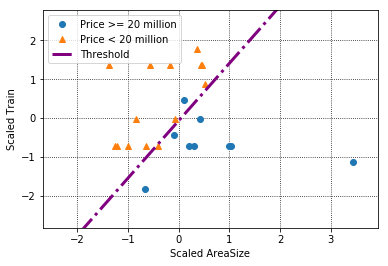

In [11]:
x1 = X_scaled[:,0] # 標準化されたAreaSize
x2 = X_scaled[:,1] # 標準化されたTrain

# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

plt.plot(x1[y], x2[y], 'o', color='C0', label='Price >= 20 million')
plt.plot(x1[~y], x2[~y], '^', color='C1', label='Price < 20 million')

# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')

plt.xlabel("Scaled AreaSize")
plt.ylabel("Scaled Train")
plt.show()

In [12]:
# ラベルを予測
y_est = clf.predict(X)

# 確率値を得る
y_est_proba = clf.predict_proba(X)

# 対数尤度を表示
# log_lossは「負の」対数尤度を計算する関数であるため， - をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
l = 0
epsilon = 1e-15
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -483.543
対数尤度 = -483.543
正答率 = 39.130%


In [13]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 2000万未満', '正解 = 2000万以上'], 
                        columns=['予測 = 2000万未満', '予測 = 2000万以上'])
conf_mat

,予測 = 2000万未満,予測 = 2000万以上
正解 = 2000万未満,0,14
正解 = 2000万以上,0,9
